# US Airline Tweets Sentiment Analysis

<img  style="float: center;  border:5px solid #ffb037;"  src="https://cdn.dribbble.com/users/846207/screenshots/7617197/media/e87a923768846bc12f00539d66e80931.gif">

# **The Objective**

The goal of this work is to do sentiment analysis about the problems of each major U.S. airline based on twitter data. In this work, I will build classification model that can predict whether tweet is positive, negative, or neutral. I will use some algorithms (KNN, Logistic Regression, SVC, Naive Bayes, Decision Tree, Random Forest, Bagging, and Boosted Tree) and perform grid-search to find the best parameters for each algorithm.

# **The Dataset**

The dataset used in this work is taken from https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?select=Tweets.csv.

Import the library and dataset that will be used.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Tweets.csv')
print(df.shape)
df.head(2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.describe().T

# **Exploratory Data Analysis**

**Create a countplot to see the distribution of each sentiment type**

In [ ]:
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

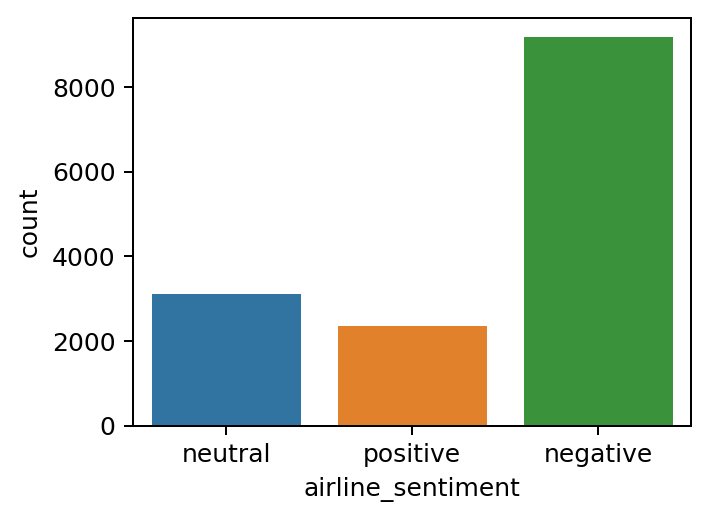

In [7]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

In [8]:
cprint("Total number of tweets for each airline :",'green')
print(df.groupby('airline')['airline_sentiment'].count())

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

From the graph above, we can see that the labels are imbalance with more than half of the tweets are negative.

**Sentiment for each airline**

<AxesSubplot:xlabel='airline', ylabel='count'>

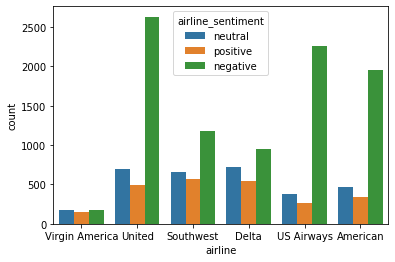

In [9]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()

In [ ]:
cprint("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

United has the most negative sentiments, while Virgin America has the lowest.
Let's look at percentage of the negative reviews for each airline.

In [10]:
neg_review = df[df['airline_sentiment']=='negative']

In [11]:
neg_review.shape

(9178, 15)

In [12]:
neg_review['airline_sentiment'].unique()

array(['negative'], dtype=object)

In [13]:
total_neg = pd.DataFrame(neg_review.groupby('airline')['airline_sentiment'].count())

In [14]:
total_neg = total_neg.reset_index()

In [15]:
total_neg

,airline,airline_sentiment
0,American,1960
1,Delta,955
2,Southwest,1186
3,US Airways,2263
4,United,2633
5,Virgin America,181


In [16]:
all_review = pd.DataFrame(df.groupby('airline')['airline_sentiment'].count()).reset_index()

In [17]:
all_review

,airline,airline_sentiment
0,American,2759
1,Delta,2222
2,Southwest,2420
3,US Airways,2913
4,United,3822
5,Virgin America,504


In [18]:
all_review.columns = ['airline','total_reviews']

In [19]:
all_review

,airline,total_reviews
0,American,2759
1,Delta,2222
2,Southwest,2420
3,US Airways,2913
4,United,3822
5,Virgin America,504


In [20]:
all_review['neg_reviews'] = total_neg['airline_sentiment']
all_review['neg_percent_reviews'] = all_review['neg_reviews'] / all_review['total_reviews']

In [21]:
all_review

,airline,total_reviews,neg_reviews,neg_percent_reviews
0,American,2759,1960,0.710402
1,Delta,2222,955,0.429793
2,Southwest,2420,1186,0.490083
3,US Airways,2913,2263,0.776862
4,United,3822,2633,0.688906
5,Virgin America,504,181,0.359127


<AxesSubplot:xlabel='airline', ylabel='neg_percent_reviews'>

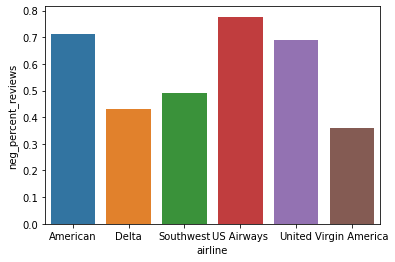

In [22]:
sns.barplot(data=all_review,x="airline",y="neg_percent_reviews")

From the graph:
* Virgin America has the most balanced sentiment.
* American, US Airways, and United each has majority negative sentiment.

**Negative Reasons**

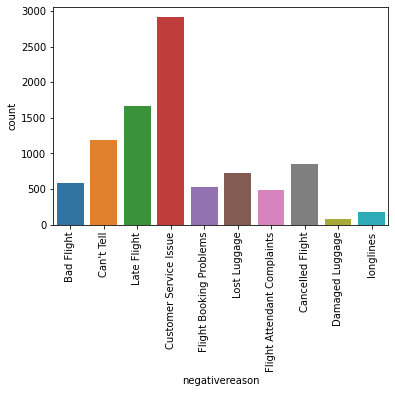

In [23]:
cprint('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

In [ ]:
plt.figure(figsize = (24, 10))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

Customer service issue is the main reason of negative sentiment.

In [ ]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

## **Stacked bar chart to show the distribution of reviews per company**

In [ ]:
import plotly.graph_objects as go
crosstab_sentiments=pd.crosstab(df.Airline, df.Airline_Sentiment)
companies=list(crosstab_sentiments.index)

fig = go.Figure(data=[
    go.Bar(name=col_name, x=companies, y=list(crosstab_sentiments[col_name]))
for col_name in list(crosstab_sentiments.columns)])
# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Sentiment distribution per company',
                  yaxis=dict(title='Sentiment distribution'),
                 xaxis=dict(title='Companies'))
fig.show()

## **Stacked bar chart to show negative reasons distributions per company**

In [ ]:
crosstab_neg_reasons = pd.crosstab(df["Airline"], df["Negativereason"])
companies = list(crosstab_neg_reasons.index)

fig = go.Figure(data = [
    go.Bar(name = col_name, x = companies, y = list(crosstab_neg_reasons[col_name]))
for col_name in list(crosstab_neg_reasons.columns)])

fig.update_layout(barmode = "stack",
                 title = "Negative Reasons Distribution per Company",
                 yaxis = dict(title = "Negative reasons Distribution"),
                 xaxis = dict(title = "Companies"))
fig.show()

## **Pie plot to check the overall distribution for negative reasons**

In [ ]:
labels = list(crosstab_neg_reasons.columns)
values = [crosstab_neg_reasons[col_name].sum() for col_name in labels]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title='Overall distribution for negative reasons')
fig.show()

In [ ]:
# Split text of Sentiments    
positive = df[df['airline_sentiment'] == 'positive'].text
neutral  = df[df['airline_sentiment'] == 'neutral'].text
negative  = df[df['airline_sentiment'] == 'negative'].text

In [ ]:
# world could of positive sentiments
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(positive))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
ax.grid(False)

In [ ]:
# world could of neutral sentiments
plt.figure(figsize = (20,20)) 
worldcould_neutral = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(neutral))
plt.imshow(worldcould_neutral,interpolation = 'bilinear')
ax.grid(False)

In [ ]:
# world could of negative sentiments
plt.figure(figsize = (20,20)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

# **Data Cleaning**

From the dataset, we only need two columns (text and airline_sentiment)

In [24]:
df = df[['text','airline_sentiment']]

In [25]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [26]:
df.shape

(14640, 2)

**Check the missing values**

In [27]:
df.isna().sum()

text                 0
airline_sentiment    0
dtype: int64

**Check the duplicates**

In [28]:
df.duplicated().sum()

188

**Remove the duplicates**

In [29]:
df = df.drop_duplicates()

In [30]:
df.duplicated().sum()

0

In [31]:
df.shape

(14452, 2)

**Clean the text data**

In [32]:
import re

In [33]:
def clean_text(text):
   
    text = str(text).lower() # convert text to lowercase
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text) # Remove URl and tags
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text) # Remove punctuation
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [34]:
df['text'] = df['text'].apply(clean_text)

In [35]:
df['text'].head()

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: text, dtype: object

# **Train Test Split**

The approach here will use Cross Validation on 90% of the dataset, and then judge the results on a final test set of 10% to evaluate the model


**Split the dataset into features (X) and label/target (y)**

In [36]:
X = df['text']
y = df['airline_sentiment']

**Split the dataset into training set and testing set with ratio 90% : 10%.**

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13006,), (1446,), (13006,), (1446,))

# **Feature Engineering**

Use TfidfVectorizer to convert a collection of raw documents to a matrix of TF-IDF features.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
vectorizer = TfidfVectorizer(stop_words='english')

In [41]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [42]:
X_train

<13006x12004 sparse matrix of type '<class 'numpy.float64'>'
	with 112877 stored elements in Compressed Sparse Row format>

In [43]:
X_test

<1446x12004 sparse matrix of type '<class 'numpy.float64'>'
	with 11710 stored elements in Compressed Sparse Row format>

# **Grid Search & Cross Validation**

**Create a grid search function with cross validation.**

In [44]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [45]:
def grid_search(model, parameters):
    # Use f1_weighted as scoring since we already know that the dataset has imbalance labels
    grid = HalvingGridSearchCV(estimator=model, param_grid=parameters,factor=2, cv=5, 
                               scoring='f1_weighted',random_state=42,error_score=0)
    grid.fit(X_train, y_train)
    print('Best Score : ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)

# **Logistic Regression Model**

**Create a base model of logistic regression, then perform a grid search to find the best parameters for final model.**

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression(class_weight='balanced')

In [48]:
logreg_param = [{'penalty':['l1','l2','none'],
               'solver': ['liblinear', 'saga'],
               'C':[0.001,0.01,0.1,1,10],
               'multi_class':['auto','ovr','multinomial']},
               {'penalty':['l2','none'],
               'solver': ['sag','newton-cg','lbfgs'],
               'C':[0.001,0.01,0.1,1,10],
               'multi_class':['auto','ovr','multinomial']}]

In [49]:
# grid_search(logreg,logreg_param)

Use the grid search results - best parameters for final logistic regression model.

In [50]:
logreg_model = LogisticRegression(class_weight='balanced',C=0.1,multi_class='multinomial',penalty='l2',solver='sag')

# **KNN Model**

**Create a base model of KNN, then perform a grid search to find the best parameters for final model.**

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier()

In [53]:
knn_param = {'n_neighbors':list(range(5,30)),
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [54]:
# grid_search(knn, knn_param)

Use the grid search results - best parameters for final KNN model.

In [55]:
KNN_model = KNeighborsClassifier(algorithm='ball_tree',n_neighbors=12,weights='distance')

# **SVC Model**

**Create a base model of Support Vector Classifier, then perform a grid search to find the best parameters for final model.**

In [56]:
from sklearn.svm import SVC

In [57]:
svc = SVC(class_weight='balanced')

In [58]:
svc_param = {'C':[0.001, 0.01, 0.1, 1, 10],
              'kernel':['linear','poly','rbf','sigmoid'],
              'gamma':['scale','auto',0.001, 0.01, 0.1, 1, 10]}

In [59]:
# grid_search(svc, svc_param)

Use the grid search results - best parameters for final SVC model.

In [60]:
SVC_model = SVC(class_weight='balanced',C=1,gamma=1,kernel='linear')

# **Naive Bayes Model**

The Naive Bayes model here will use default parameters.

In [61]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB

In [62]:
BNB_model = BernoulliNB()
GNB_model = GaussianNB()
MNB_model = MultinomialNB()
CNB_model = ComplementNB()
NB_param = {}

In [63]:
grid_search(BNB_model,NB_param)

Best Score :  0.6826802304531071
Best parameters :  {}


In [64]:
grid_search(MNB_model,NB_param)

Best Score :  0.5924478934755192
Best parameters :  {}


In [65]:
grid_search(CNB_model,NB_param)

Best Score :  0.7369253091498471
Best parameters :  {}


In [66]:
grid2 = HalvingGridSearchCV(estimator=GNB_model, param_grid=NB_param,factor=2, cv=5, 
                               scoring='f1_weighted',random_state=42,error_score=0)
grid2.fit(X_train.toarray(), y_train)
print('Best Score : ',grid2.best_score_)
print('Best parameters : ')
print(grid2.best_params_)

Best Score :  0.5148436062659207
Best parameters : 
{}


Based on the results, MNB_model and GNB_model did not perform really well (with f1_score below 0.6). So, I will not use them for final evaluation. I will use BNB_model and CNB_model instead.

In [67]:
BNB_model = BernoulliNB()
CNB_model = ComplementNB()

# **Decision Tree Model**

**Create a base model of decision tree, then perform a grid search to find the best parameters for final model.**

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
DecTree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [70]:
DT_param = {'criterion':['gini','entropy','log_loss'],
           'max_features':['sqrt','log2', None],
           'max_depth':[None,5,6,7,8,9,10,11,12,13,14,15]}

In [71]:
# grid_search(DecTree,DT_param)

Use the grid search results - best parameters for final Decision Tree model.

In [72]:
DTC_model = DecisionTreeClassifier(criterion='gini',max_features=None,max_depth=None,class_weight='balanced', random_state=42)

# **Random Forest Model**

**Create a base model of random forest, then perform a grid search to find the best parameters for final model.**

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
RFC = RandomForestClassifier(random_state=42, class_weight='balanced')

In [75]:
RFC_param = {'criterion':['gini','entropy','log_loss'],
           'max_features':['sqrt','log2', None],
            'n_estimators':[50,100,150,200,250,300,400],
            'max_depth':[None,5,6,7,8,9,10,11,12,13,14,15]}

In [76]:
# grid_search(RFC, RFC_param)

Use the grid search results - best parameters for final Random Forest model.

In [77]:
RFC_model = RandomForestClassifier(criterion='entropy',max_features=None,n_estimators=400,max_depth=15,random_state=42, class_weight='balanced')

# **Bagging Classifier Model**

Bagging Classifier Model will use final decision tree model (DTC_model) as base estimator.

In [78]:
from sklearn.ensemble import BaggingClassifier

In [79]:
Bagging = BaggingClassifier(base_estimator=DTC_model,random_state=42)

In [80]:
bag_param = {'n_estimators':[50,100,150,200,250,300,400],
            'bootstrap':[True,False]}

In [81]:
# grid_search(Bagging,bag_param)

Use the grid search results - best parameters for final Bagging Classifier model.

In [82]:
Bagging_model = BaggingClassifier(base_estimator=DTC_model,random_state=42,bootstrap=True,n_estimators=300)

# **AdaBoost Model**

AdaBoost Model will use final decision tree model (DTC_model) as base estimator.

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
Adaboost = AdaBoostClassifier(base_estimator=DTC_model,random_state=42)

In [85]:
Ada_param = {'n_estimators':[50,100,150,200,250,300,400],
            'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]}

In [86]:
# grid_search(Adaboost,Ada_param)

Use the grid search results - best parameters for final AdaBoost model.

In [87]:
Adaboost_model = AdaBoostClassifier(learning_rate=0.1,n_estimators=100,base_estimator=DTC_model,random_state=42)

# **Gradient Boosting Model**

**Create a base model of gradient boosting, then perform a grid search to find the best parameters for final model.**

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
GB = GradientBoostingClassifier(random_state=42)

In [90]:
GB_param = {'n_estimators':[50,100,150,200,250,300,400],
            'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
           'max_features':['sqrt','log2',None],
           'max_depth':[None,5,6,7,8,9,10,11,12,13,14,15]}

In [92]:
# grid_search(GB,GB_param)

Best Score :  0.7171231221060188
Best parameters :  {'learning_rate': 0.2, 'max_depth': 7, 'max_features': None, 'n_estimators': 200}


Use the grid search results - best parameters for final Gradient Boosting model.

In [93]:
GB_model = GradientBoostingClassifier(learning_rate=0.2,max_depth=7,max_features=None,n_estimators=200,random_state=42)

# **Final Model Evaluation**

**List all the final models we obtain from grid search above.**

In [94]:
models = [logreg_model, KNN_model, SVC_model, BNB_model, CNB_model, DTC_model,
          RFC_model, Bagging_model, Adaboost_model, GB_model]

In [95]:
from sklearn.metrics import accuracy_score,f1_score, ConfusionMatrixDisplay,classification_report

In [96]:
accuracy_scores = []
f1_scores = []

LogisticRegression(C=0.1, class_weight='balanced', multi_class='multinomial',
                   solver='sag')

              precision    recall  f1-score   support

    negative       0.89      0.79      0.84       889
     neutral       0.52      0.71      0.60       313
    positive       0.71      0.67      0.69       244

    accuracy                           0.75      1446
   macro avg       0.71      0.72      0.71      1446
weighted avg       0.78      0.75      0.76      1446



KNeighborsClassifier(algorithm='ball_tree', n_neighbors=12, weights='distance')

              precision    recall  f1-score   support

    negative       0.80      0.88      0.84       889
     neutral       0.58      0.45      0.51       313
    positive       0.67      0.60      0.63       244

    accuracy                           0.74      1446
   macro avg       0.68      0.64      0.66      1446
weighted avg       0.73      0.74      0.73      1446



SVC(C=1, class_weight='balanced', gamma=1

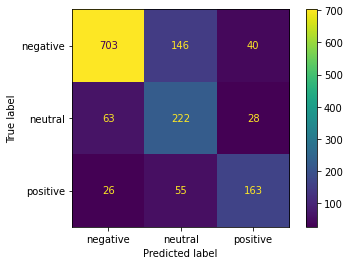

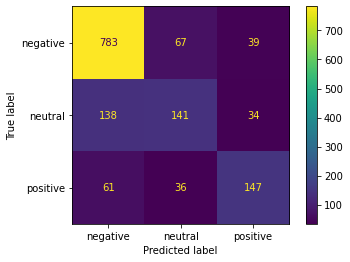

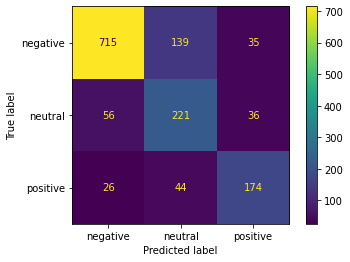

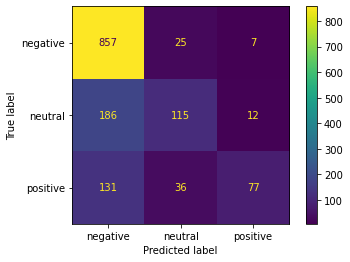

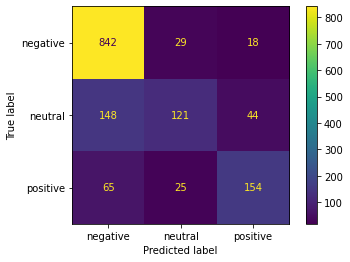

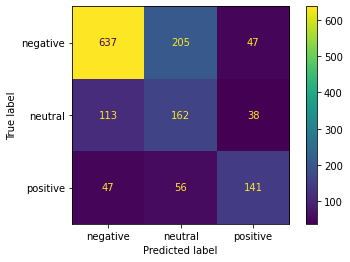

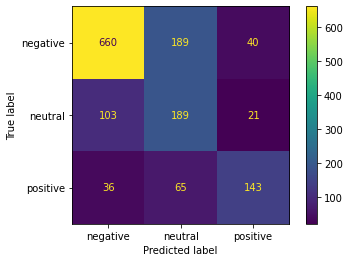

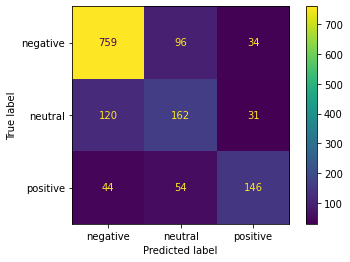

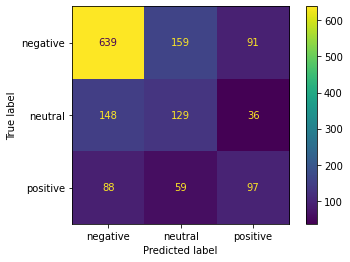

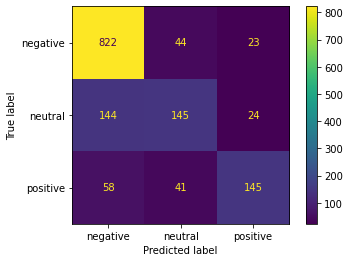

In [97]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test,y_pred)
    accuracy_scores.append(acc)
    
    f1 = f1_score(y_test,y_pred,average='weighted')
    f1_scores.append(f1)
    
    print(model)
    print()
    print(classification_report(y_test,y_pred,labels=model.classes_))
    print()
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,labels=model.classes_)
    print()

In [98]:
accuracy_scores

[0.7524204702627939,
 0.7406639004149378,
 0.7676348547717843,
 0.7254495159059474,
 0.7724757952973721,
 0.6500691562932227,
 0.686030428769018,
 0.7378976486860305,
 0.5982019363762102,
 0.7690179806362379]

In [99]:
f1_scores

[0.7606137202539621,
 0.7310860343450013,
 0.7749728757879148,
 0.6890341245813203,
 0.7528989966829184,
 0.6610976741599717,
 0.696720214801226,
 0.7355508223614842,
 0.5999801335900921,
 0.7561888785552755]

In [100]:
clf_model = ['Logistic Regression', 'KNN', 'SVC', 'Bernoulli NB', 'Complement NB', 'Decision Tree',
          'Random Forest', 'Bagging Tree', 'AdaBoost', 'Gradient Boosting']

**Create a plot to visualize the model performance**

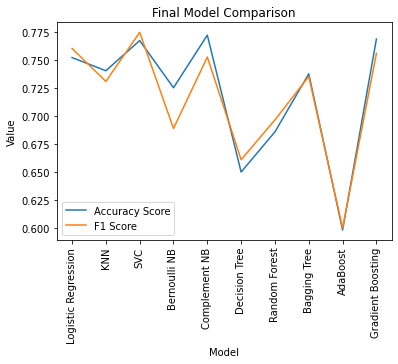

In [101]:
plt.plot(clf_model,accuracy_scores,label='Accuracy Score')
plt.plot(clf_model,f1_scores,label='F1 Score')
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Final Model Comparison')
plt.legend()
plt.xticks(rotation=90);

**Because the class labels in dataset are unbalanced, so we use the f1 score to determine the best model.**

# **CONCLUSION**

After performing cross validation and hyper parameter tuning via grid search, also evaluating the final 10 models to unseen dataset, here are some conclusion.
1. The best model is SVC (C=1, gamma=1, kernel='linear') with 76.8% accuracy and 77.5% f1 score.
2. Decision Tree improves significantly after used on Bagging Classifier.
3. Neutral is the hardest class label to predict accurately.

**Thank you for reading this notebook. Feel free to give some constructive advice or suggestion. I will really appreciate it.**